<Body>   
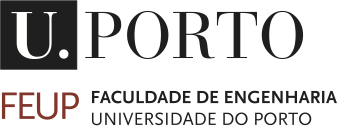   
<h1> <b>Swarm Robotics Competitions 2022/2023 </b> </h1>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt)

FEUP, Oct. 2022

---


# **Motion control of a single agent** 

## What is a control system? 

<Body>   
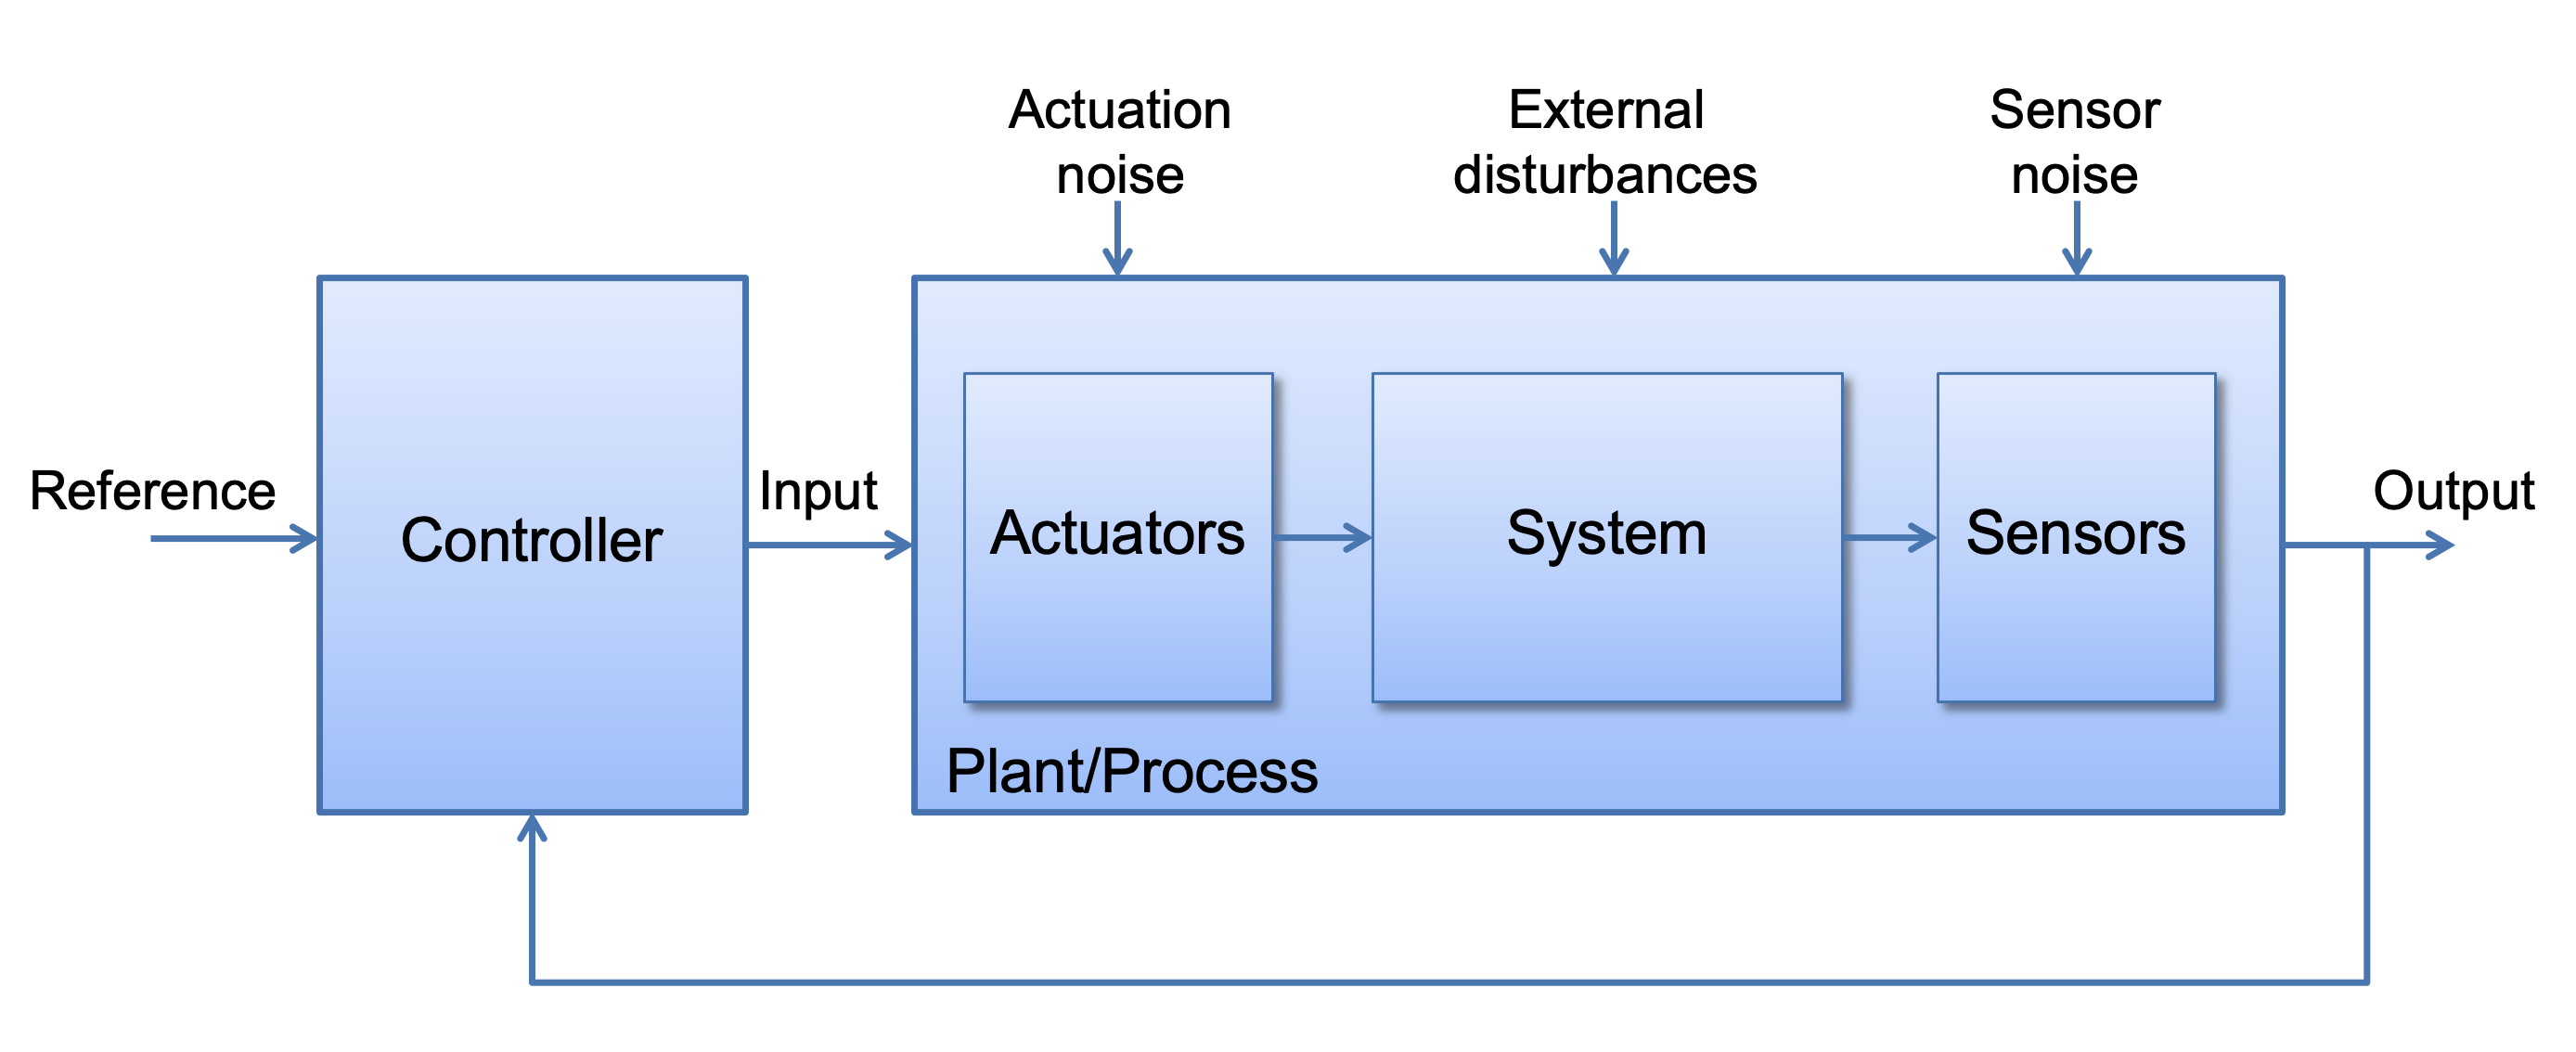


### Control Problem:

Design a controller (algorithm) that in **real-time** stabilizes the plant, and make the output signal to track the reference despite external disturbances, noises, and uncertainty.

*In our case the system is a single integrator.*
 


### The single integrator dynamics


Consider the following dynamical system
$$
\dot x=u
$$
where $x(t)\in\mathbf{R}$ is the state and $u(t)\in\mathbf{R}$ is the input signal, and $\dot x$ denotes the derivative with respect to time $t$, that is, $\dot x = \frac{d x(t)}{dt}$

We can think $x$ as the position and $u$ as the velocity (which in this case is your command).


Let's now see how it evolves in time as a function of the input $u(t)$.

For this end, we will numerically solve  the ODE (ordinary differencial equation)!

A simple approach is to use the **Euler discretization** to approximate the solution of a continuous time differential equation
https://en.wikipedia.org/wiki/Euler_method

That is, 
$$
\frac{d x(t)}{dt} \approx \frac{x(t+h)-x(t)}{h} 
$$
where $h \ge 0$ is the step size.

It turns out that for a step size sufficiently small, we can obtain a very good approximation. 





In our case, we obtain

$$
\frac{x(t+h)-x(t)}{h} \approx u(t)
$$

By denoting $x_i=x(t_i)$ and $x_{i+1}=x(t_i + h)$, after some simple mathematical manipulation, we obtain the *discrete system* 

$$
x_{i+1} = x_i + h\, u_i, \quad i = 0, 1, 2, \ldots
$$


Let's now show the results through simulation by plotting the (approximated) **time-evolution** of the state $x(t)$ and the control signal $u(t)$.

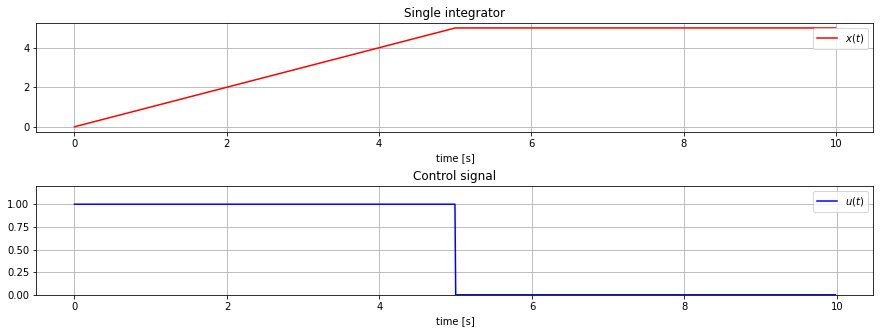

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def step_f(x,u,h):
  return x + u*h

#Sample-time
h = 0.01 
t_end=10

t_signal = np.arange(0,t_end,h) # time samples
x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)

#Initial conditions of our system
x_signal[0] = 0

# Iteration
for i in range(0,t_signal.shape[0]-1):
#    u_signal[i] = 1
    if t_signal[i]<5:
      u_signal[i] = 1
    else:
      u_signal[i] = 0
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],h)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.plot(t_signal, x_signal, 'r-', label='$x(t)$')
ax1.set_title("Single integrator")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u(t)$')
ax2.set_ylim((0, 1.2))
ax2.set_title("Control signal")
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best')


**Activity 1.** Go above and try with different initial conditions of the state $x(0)$ and different input signals $u(t)$.

**2D case:**
Consider now an agent in the plane $(x,y)$ with single integrator dynamics in each axis, that is,

$$ 
\begin{align}
\dot x_1 = u_1 \\
\dot x_2 = u_2 
\end{align}
$$


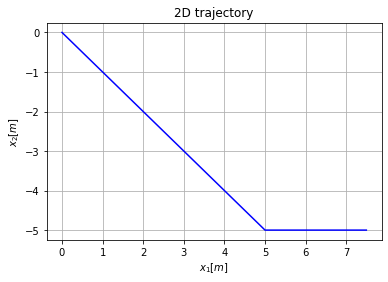

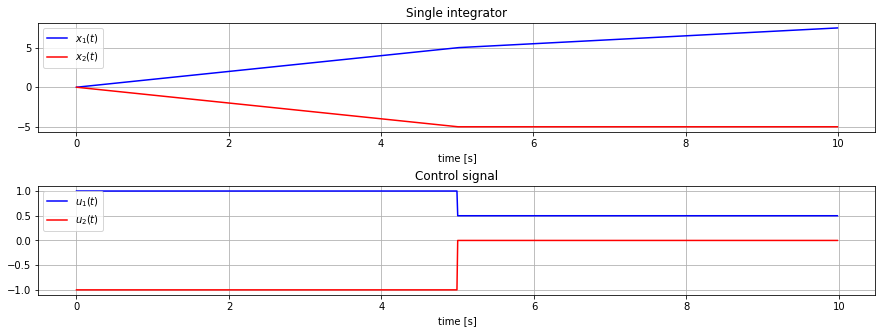

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def step_f(x,u,h):
  return x + u*h

#Sample-time
h = 0.01 
t_end=10

t_signal = np.arange(0,t_end,h) # time samples
x_signal = np.zeros_like([t_signal,t_signal])
u_signal = np.zeros_like([t_signal,t_signal])


#Initial conditions of our system
x_signal[:,0]=[0,0]

# Iteration
for i in range(0,t_signal.shape[0]-1):
    if t_signal[i]<5:
      u_signal[:,i] = [1, -1]
    else:
      u_signal[:,i] = [0.5, 0]
    x_signal[:,i+1] = step_f(x_signal[:,i],u_signal[:,i],h)

#plot
plt.figure()
plt.plot(x_signal[0], x_signal[1], label='$x_1(t), x_2(t)$', color='b')
plt.xlabel('$x_1 [m]$');
plt.ylabel('$x_2 [m]$');
plt.title('2D trajectory');
plt.grid()

fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.plot(t_signal, x_signal[0], 'b-', label='$x_1(t)$')
ax1.plot(t_signal, x_signal[1], 'r-', label='$x_2(t)$')
ax1.set_title("Single integrator")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0,0:len(t_signal)-1], 'b-', label='$u_1(t)$')
ax2.plot(t_signal[0:len(t_signal)-1], u_signal[1,0:len(t_signal)-1], 'r-', label='$u_2(t)$')
#ax2.set_ylim((0, 1.2))
ax2.set_title("Control signal")
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best')


**Activity 2.** Go above and try with different initial conditions of the state $x(0)$ and different input signals $u(t)$.


### Tracking a desired reference signal


To track in closed-loop a desired reference signal $x_d(t)$, a simple (but very efficient) feedback controller is this one: 

$$
u = - k \tilde x + \dot x_d
$$

where $k$ is a positive gain, and $\tilde x(t) = x(t)-x_d(t)$ is the tracking error.


Note that in closed-loop the tracking error satisfies:

$$
\dot {\tilde x} = - k \tilde x \,, \quad k>0
$$



Let's now check this in simulation for a desired sinusoidal signal $x_d(t) = sin (t)$

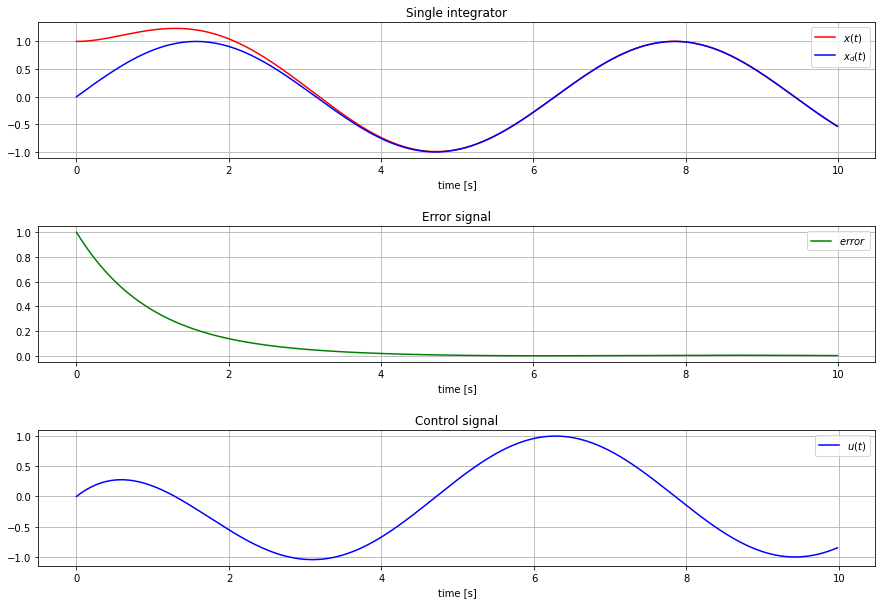

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def step_f(x,u,h):
  return x + u*h

#Sample-time
h = 0.01 
t_end=10

t_signal = np.arange(0,t_end,h) # time samples

x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)

# Reference signals
xd_signal= np.sin(t_signal)
xd_dot_signal=np.cos(t_signal)


#Initial conditions of our system
x_signal[0] = 1

#Control gain
k = 1
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -k*(x_signal[i]-xd_signal[i]) + xd_dot_signal[i]
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],h)

#plot
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(t_signal, x_signal, 'r-', label='$x(t)$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d(t)$')
ax1.set_title("Single integrator")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, x_signal-xd_signal, 'g-', label='$error$')
ax2.set_title("Error signal")
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u(t)$')
ax3.set_title("Control signal")
ax3.set_xlabel("time [s]")
ax3.grid()
ax3.legend(loc='best')



**Activity 3.** Go above and try:

1.   Other (positive) values for the gain $k$
2.   Different initial conditions $x(0)$
3. Different reference signals $x_d(t)$


**Tracking in 2D:** As before, consider now the agent in the plane $x = (x_1,x_2)$ with single integrator dynamics:

$$ 
\begin{align}
\dot x = u
\end{align}
$$

where 
$$
x = 
\begin{bmatrix} 
x_1 \\
x_2
\end{bmatrix} \,, \quad
u = 
\begin{bmatrix} 
u_1 \\
u_2 
\end{bmatrix}
$$

are the 2D state and 2D control, respectively.

Similarly, the feedback controller is now given by

$$
u = - K \tilde x + \dot x_d
$$

where $K$ is a $2\times 2$ positive-definite matrix gain, and

$$
\tilde x(t) = 
x - x_d \,, \quad
x_d(t) = 
\begin{bmatrix}
x_{1d}(t) \\
y_{2d}(t)
\end{bmatrix}
$$ 

is the 2D tracking error and desired reference signal, respectively.

Note that in closed-loop the tracking error satisfies:

$$
\dot {\tilde x} + K \tilde x = 0 \,, \quad K > 0
$$


Let's now check this in simulation for tracking a plane circle centered at the origin with radius 1, that is, 

$$
x_d(t) = 
\begin{bmatrix}
\sin(t) \\
\cos(t)
\end{bmatrix}
$$

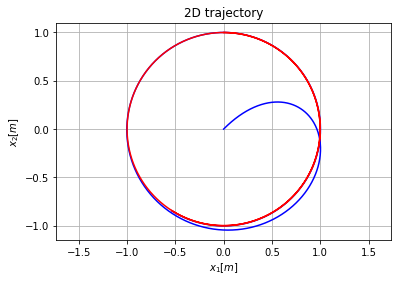

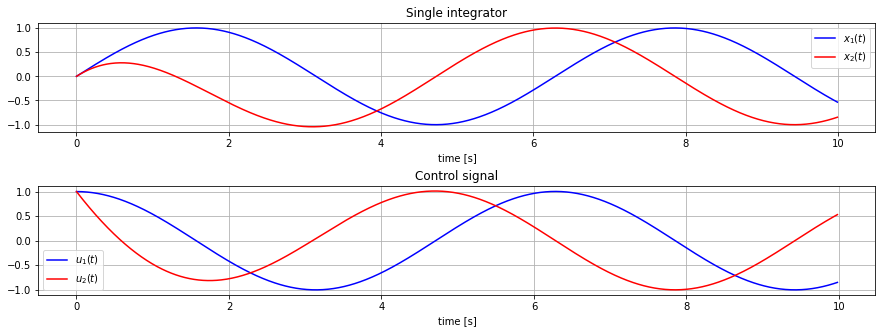

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def step_f(x,u,h):
  return x + u*h

#Sample-time
h = 0.01 
t_end=10

t_signal = np.arange(0,t_end,h) # time samples
x_signal = np.zeros_like([t_signal,t_signal])
u_signal = np.zeros_like([t_signal,t_signal])

# Reference signals
xd_signal= np.zeros_like(x_signal)
xd_signal[0]= np.sin(t_signal)
xd_signal[1]= np.cos(t_signal)
xd_dot_signal= np.zeros_like(x_signal)
xd_dot_signal[0]= np.cos(t_signal)
xd_dot_signal[1]= -np.sin(t_signal)

# Gain matrix
k1, k2 = 1, 1
K = np.diag([k1,k2])


#Initial conditions of our system
x_signal[:,0]=[0,0]


# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[:,i] = - K @(x_signal[:,i]-xd_signal[:,i]) + xd_dot_signal[:,i]
    x_signal[:,i+1] = step_f(x_signal[:,i],u_signal[:,i],h)

#plot
plt.figure()
plt.axis('equal')
plt.plot(x_signal[0], x_signal[1], label='$x_1(t), x_2(t)$', color='b')
plt.plot(xd_signal[0], xd_signal[1], label='$x_{d1}(t), x_{d2}(t)$', color='r')
plt.xlabel('$x_1 [m]$');
plt.ylabel('$x_2 [m]$');
plt.title('2D trajectory');
plt.grid()

fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.plot(t_signal, x_signal[0], 'b-', label='$x_1(t)$')
ax1.plot(t_signal, x_signal[1], 'r-', label='$x_2(t)$')
ax1.set_title("Single integrator")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0,0:len(t_signal)-1], 'b-', label='$u_1(t)$')
ax2.plot(t_signal[0:len(t_signal)-1], u_signal[1,0:len(t_signal)-1], 'r-', label='$u_2(t)$')
#ax2.set_ylim((0, 1.2))
ax2.set_title("Control signal")
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best')




---
---
